First, lets import all necessary modules, including Matplotlib for plotting

Also, define parameters for plotting, including colors

In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
import libra_py.workflows.nbra.step4 as step4
from libra_py import influence_spectrum as infsp


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

Here is where we define our model. For this model, we can denerate the Hvib matrices along the pre-computed trajectories (the NBRA assumption). NBRA = neglect of back-reaction approximation. 

In this example, we only imagine a system evolving in time such that the adiabatic energies and non-adiabatic couplings are constant for all times - really the simplest model problem. Well, in reality, this may be not that simple to realise, but we don't care here.

We generate a single data set (one "trajectory") - that's why len(Hvib) == 1 

The trajectory comprises nsteps = 1000 nuclear timesteps

Adiabatic energy levels are at -0.001 and 0.001 a.u. and the NAC is at 0.001 a.u. as well

In [2]:
nsteps = 100

# Populate Hvib - this is our model
Hvib = []
hvib = []
for i in xrange(nsteps):
    hvib.append(CMATRIX(2,2))
    hvib[i].set(0,0, 0.000+0.0j);   hvib[i].set(0,1, 0.0+0.005j);
    hvib[i].set(1,0, 0.0-0.005j);   hvib[i].set(1,1, 0.001+0.0j);
Hvib.append(hvib)

We can also to an arbitrary scaling of the Hamiltonian.

Uncomment the line in the code below to increase the gap by 0.1 and multiply the coupling by a factor of 3

In [3]:
params = {}
params.update({"nfreqs":10, "logname":"out.log", "filename":"influence_spectra_" })

freqs, T, norm_acf, raw_acf, W, J, J2 = infsp.compute_all(Hvib[0], params)

print "====== 0, 0 ======"
print freqs[0][0]
print "====== 0, 1 ======"
print freqs[0][1]
print "====== 1, 0 ======"
print freqs[1][0]
print "====== 1, 1 ======"
print freqs[1][1]

Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  3000.0
Use the default value =  0
Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  3000.0
Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  3000.0
Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  3000.0
Use the default value =  0
====== 0, 0 ======
[]
====== 0, 1 ======
[[240.0, -1787.2144006456724, -0.28606658441413335], [412.0, 1056.3363157085823, 0.16908017399490144], [582.0, -751.6620211694258, -0.12031314595052431], [751.0, 583.8363599614033, 0.09345049664472305], [919.0

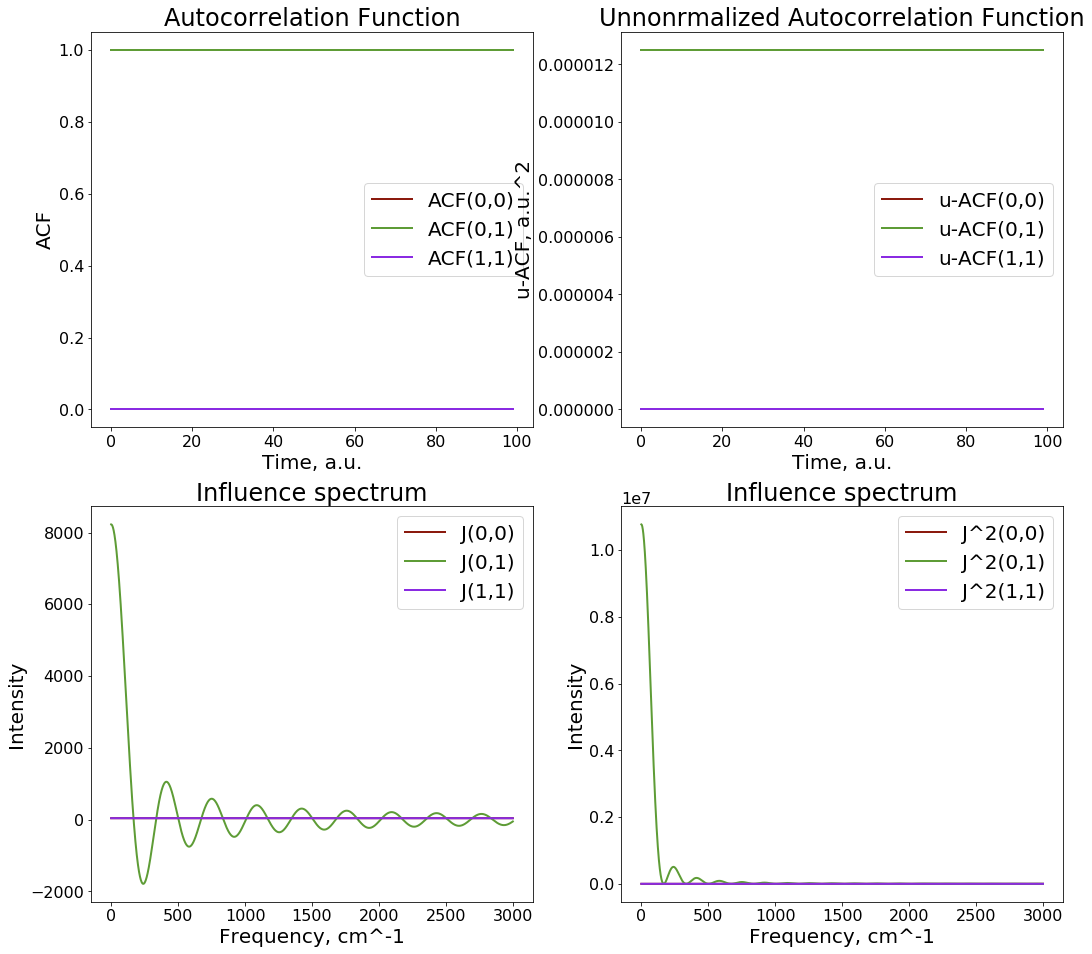

In [11]:
plt.figure(1, figsize=(18, 16)) # dpi=300, frameon=False)
plt.subplot(2,2,1)
plt.title('Autocorrelation Function')
plt.xlabel('Time, a.u.')
plt.ylabel('ACF')
plt.plot(T[0][0], norm_acf[0][0], label='ACF(0,0)', linewidth=2, color = colors["11"]) 
plt.plot(T[0][1], norm_acf[0][1], label='ACF(0,1)', linewidth=2, color = colors["21"]) 
plt.plot(T[1][1], norm_acf[1][1], label='ACF(1,1)', linewidth=2, color = colors["31"]) 
plt.legend()

plt.subplot(2,2,2)
plt.title('Unnonrmalized Autocorrelation Function')
plt.xlabel('Time, a.u.')
plt.ylabel('u-ACF, a.u.^2')
plt.plot(T[0][0], raw_acf[0][0], label='u-ACF(0,0)', linewidth=2, color = colors["11"]) 
plt.plot(T[0][1], raw_acf[0][1], label='u-ACF(0,1)', linewidth=2, color = colors["21"]) 
plt.plot(T[1][1], raw_acf[1][1], label='u-ACF(1,1)', linewidth=2, color = colors["31"]) 
plt.legend()

plt.subplot(2,2,3)
plt.title('Influence spectrum')
plt.xlabel('Frequency, cm^-1')
plt.ylabel('Intensity')
plt.plot(W[0][0], J[0][0], label='J(0,0)', linewidth=2, color = colors["11"]) 
plt.plot(W[0][1], J[0][1], label='J(0,1)', linewidth=2, color = colors["21"]) 
plt.plot(W[1][1], J[1][1], label='J(1,1)', linewidth=2, color = colors["31"]) 
plt.legend()

plt.subplot(2,2,4)
plt.title('Influence spectrum')
plt.xlabel('Frequency, cm^-1')
plt.ylabel('Intensity')
plt.plot(W[0][0], J2[0][0], label='J^2(0,0)', linewidth=2, color = colors["11"]) 
plt.plot(W[0][1], J2[0][1], label='J^2(0,1)', linewidth=2, color = colors["21"]) 
plt.plot(W[1][1], J2[1][1], label='J^2(1,1)', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

In [5]:
params = {}
params.update({"T":300.0, "ntraj":1000, "sh_method":1, "decoherence_method":1, "dt":41.0})
params.update({"nsteps":nsteps, "Boltz_opt":1})
params.update({"istate":1, "init_times":[0], "outfile":"_out.txt"})
params.update({"data_set_paths":[""]})

Now, lets run the TSH calculations.

The output is a nsteps x 10 matrix, wich contains all sorts of information - energies, populations, different types of weighted sums. The example format for a 2-state calculation is shown below.

In [6]:
# nstates = 2 => n_cols = 2*3 + 4 = 10
#        0    1      2     3    4      5      6     7     8    9
# res = E0, P_SE0, P_SH0, E1, P_SE1, P_SH1, E_SE, E_SH, P_SE, P_SH
res = step4.run(Hvib, params)

Decoherence times matrix (a.u. of time):
Decoherence times matrix (fs):
Decoherence rates matrix (a.u.^-1):


The nsteps x 10 matrix returned above needs to be uppacked so that the resulting Python lists could be used in plotting with matplotlib.

In [7]:
t, E, P0, P1 = [], [], [], []
for i in xrange(nsteps):
    t.append(i*params["dt"]*units.au2fs)  # time
    E.append(res.get(i, 7))   # SH-weighted energy
    P0.append(res.get(i, 2))  # SH pop of state 0
    P1.append(res.get(i, 5))  # SH pop of state 1

Finally, we can plot the results. 

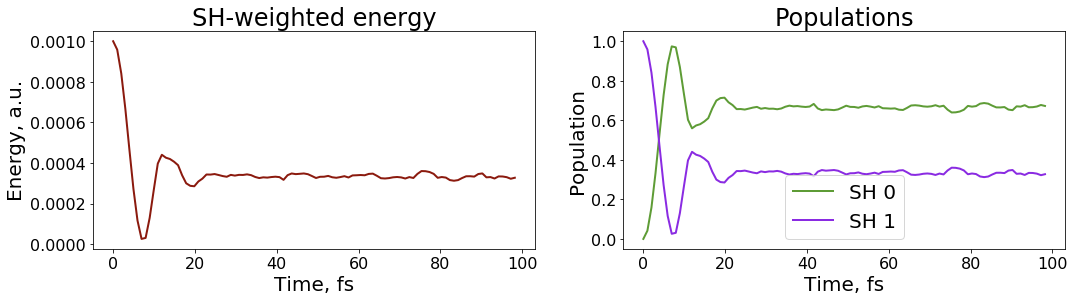

In [8]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('SH-weighted energy')
plt.xlabel('Time, fs')
plt.ylabel('Energy, a.u.')
plt.plot(t, E, label='', linewidth=2, color = colors["11"]) 

plt.subplot(1,2,2)
plt.title('Populations')
plt.xlabel('Time, fs')
plt.ylabel('Population')
plt.plot(t, P0, label='SH 0', linewidth=2, color = colors["21"]) 
plt.plot(t, P1, label='SH 1', linewidth=2, color = colors["31"]) 


plt.legend()
plt.show()
plt.close()

We can now also look at the relative population of the two states when the system reaches termal equilibrium. Do the computed populations agree with what is expected from the Boltzmann distribution?

In [9]:
E0 = Hvib[0][0].get(0,0).real
E1 = Hvib[0][0].get(1,1).real
boltz_ratio = math.exp(-(E1-E0)/(units.kB*params["T"]))
print "Expected Boltzman populations factor, total pop on state 1 / total pot on stat 0 ", boltz_ratio
print "actual ration of the populations on the two states, at equilibrium = ", P1[99]/P0[99]

Expected Boltzman populations factor, total pop on state 1 / total pot on stat 0  0.349035297298
actual ration of the populations on the two states, at equilibrium =  0.486779258018
